# 1. Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd    # import pandas lib. using it's short form pd

In [2]:
data = pd.read_excel(r'glass.xlsx', sheet_name= 'glass', header=0) #load dataset into var. data using python environment (0th row as header)

In [3]:
data.head() #display top 5 rows

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.info() # gives information about null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.shape  # no. of rows & columns

(214, 10)

In [6]:
data.isnull().sum()  # there is no null value in our dataset

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
data.dtypes  # data type of each column 

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [8]:
data[data.duplicated()]  # print duplicated rows => there is one duplicated row

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
data = data.drop_duplicates()  # remove duplicated row

In [10]:
data[data.duplicated()]  # there is no duplicated row now

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


# inconsistencies in the data
It includes duplicate or irrelevant observations, incorrect data formatting, or incorrect data, outliers, missing values. We have already removed duplicate observation, there is no missing values in our dataset. There is no incorrect data formatting in our dataset. Let's check outliers 

In [11]:
data['Type'].unique()  # total 6 classes: 1,2,3,5,6,7 (class 4 not available in our dataset)

array([1, 2, 3, 5, 6, 7], dtype=int64)

# Outliers

In [12]:
import matplotlib.pyplot as plt #boxplot function is available in this lib

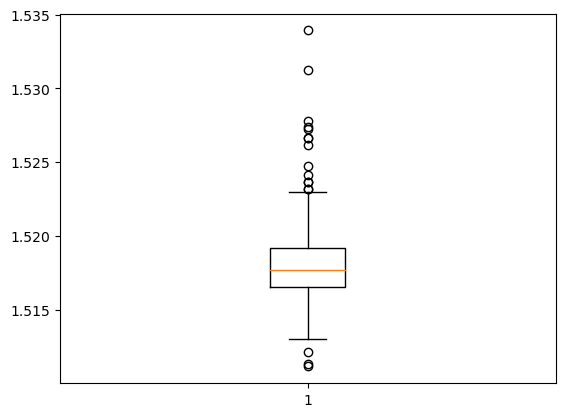

In [13]:
plt.boxplot(data['RI']) #plot boxplot for RI column
plt.show()

Range of RI: 0-1.535. Right skewed data. IQR(Inter Quartile Range) = 1.520-1.515 = 0.005 (approx). Range from 1.520-1.530 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There are two outliers above 1.530 and we can remove them from the dataset

# Treat outlier in column RI: two outliers above 1.530


In [14]:
data.drop(data[data['RI'] > 1.530].index,axis=0,inplace=True) # remove two outliers above 1.530 

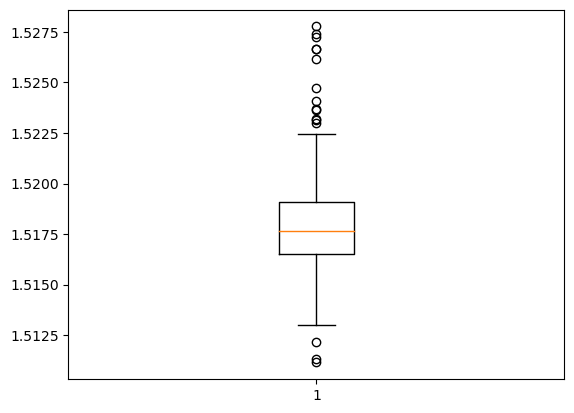

In [15]:
plt.boxplot(data['RI']) # two outliers above 1.530 have been removed now
plt.show()

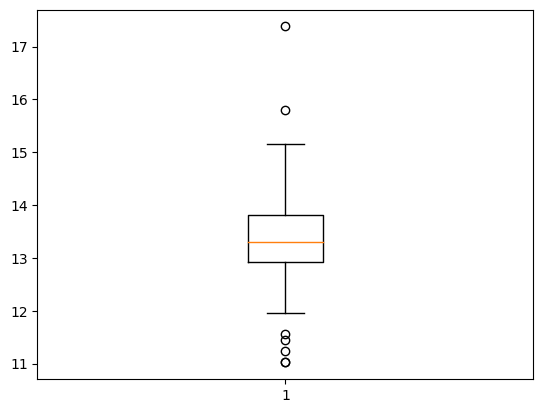

In [16]:
plt.boxplot(data['Na'])
plt.show()

Range of Na: 11-17. Skewness in the data. IQR(Inter Quartile Range) = 14-13=1(approx). Range from 11-12 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There are two outliers above 15 we can remove them from the dataset

# Treat outliers in column Na

In [17]:
data.drop(data[data['Na'] > 15].index,axis=0,inplace=True) # remove two outliers above 15

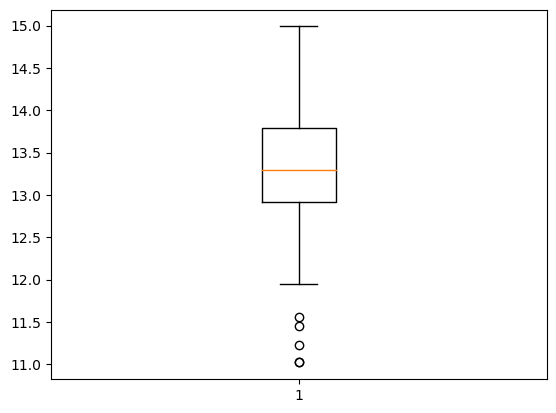

In [18]:
plt.boxplot(data['Na']) # outliers have been removed now
plt.show()

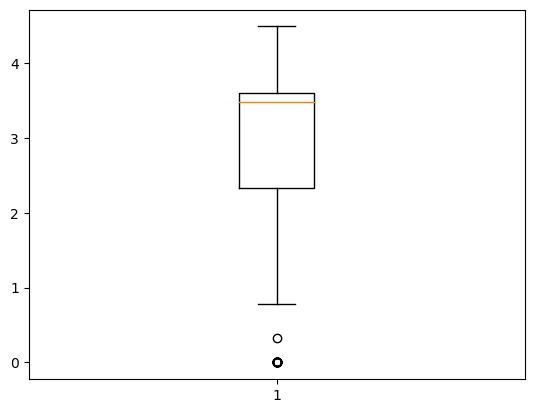

In [19]:
plt.boxplot(data['Mg'])
plt.show()

Range of Mg: 0-4. Left skewed data. IQR(Inter Quartile Range) = 4-2 = 2 (approx). There are two outliers below 1 and we can remove them from the dataset

# Treat outliers in column Mg

In [20]:
data.drop(data[data['Mg'] < 1].index,axis=0,inplace=True) # remove two outliers below 1

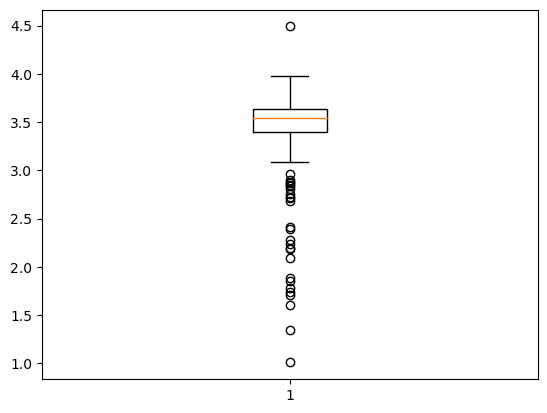

In [21]:
plt.boxplot(data['Mg']) # outliers have been removed now
plt.show()

Range from 1.5 - 3.0 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There is one outlier just above 4.2 and two outliers below 1.5, we can remove them from the dataset

In [22]:
data.drop(data[data['Mg'] > 4.2].index,axis=0,inplace=True) # remove one outlier above 4.2
#data.drop(data[data['Mg'] < 1.5].index,axis=0,inplace=True) # remove two outliers below 1.5

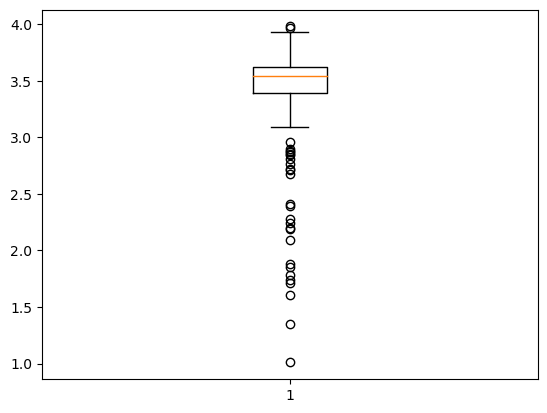

In [23]:
plt.boxplot(data['Mg']) # outliers have been removed now
plt.show()

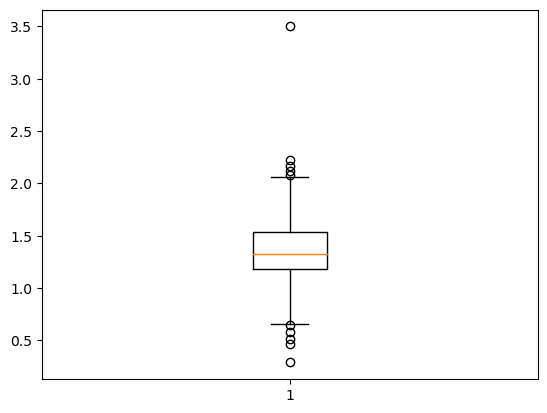

In [24]:
plt.boxplot(data['Al'])
plt.show()

Range of Al: 0-3.5. Right skewed data. IQR(Inter Quartile Range) = 1.5-1.0 = 0.5 (approx). Range from 0-0.5 & 2.0-2.5 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There is one outlier above 3.0 and we can remove it from the dataset

# Treat outlier in column Al

In [25]:
data.drop(data[data['Al'] > 3.0].index,axis=0,inplace=True) # remove one outlier above 3.0

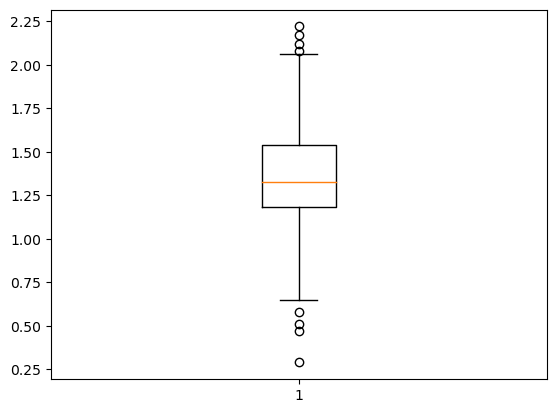

In [26]:
plt.boxplot(data['Al']) # one outlier has been removed now
plt.show()

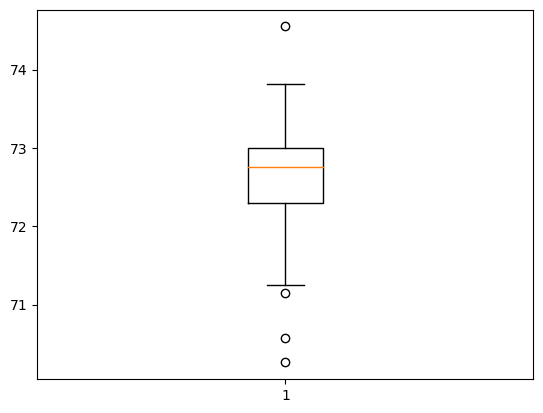

In [27]:
plt.boxplot(data['Si'])
plt.show()

Range of Si: 0-74. Skewness in the data. IQR(Inter Quartile Range) = 73-72 = 1 (approx). There are two outliers below 71 and one outlier above 74,so, we can remove them from the dataset

# Treat outlier in column Si

In [28]:
data.drop(data[data['Si'] < 71].index,axis=0,inplace=True) 
data.drop(data[data['Si'] > 74].index,axis=0,inplace=True) 

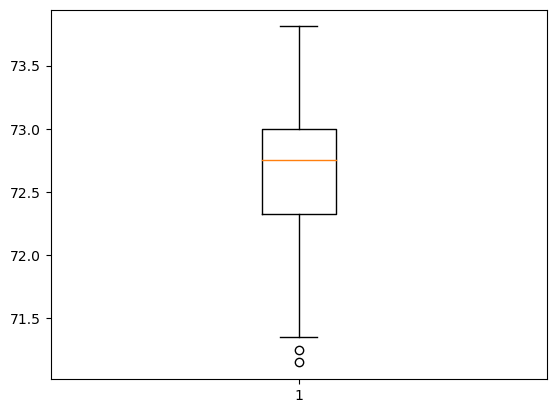

In [29]:
plt.boxplot(data['Si']) # outliers have been removed now
plt.show()

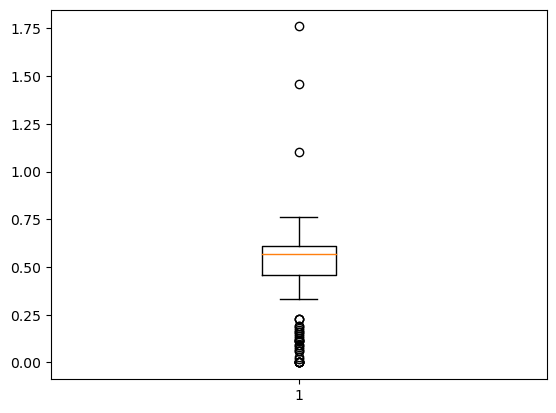

In [30]:
plt.boxplot(data['K'])
plt.show()

Range of K: 0-1.75. Right skewed data. IQR(Inter Quartile Range) = 0.75-0.50 = 0.25 (approx). Range from 0.00 - 0.25 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There are three outliers above 1.00 and we can remove them from the dataset

# Treat outlier in column K

In [31]:
data.drop(data[data['K'] > 1.00].index,axis=0,inplace=True) # remove three outliers above 1.00

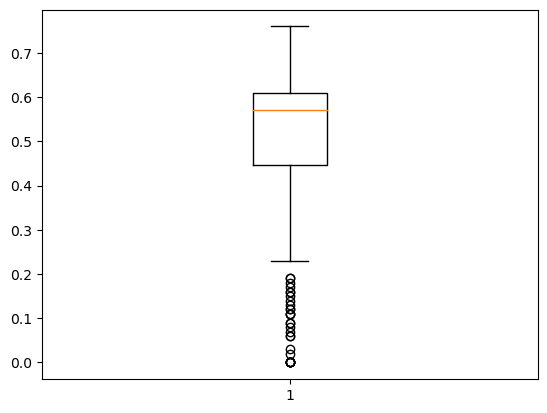

In [32]:
plt.boxplot(data['K']) #  outliers have been removed now
plt.show()

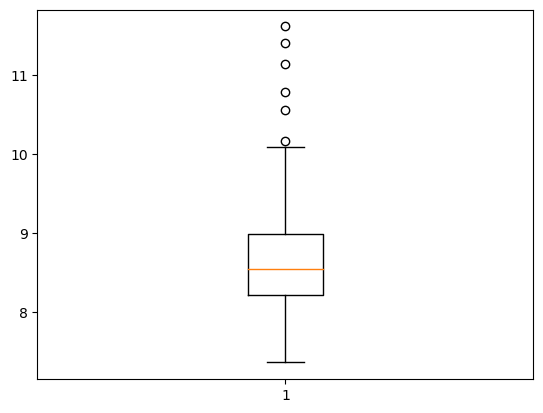

In [33]:
plt.boxplot(data['Ca'])
plt.show()

Range of Ca: 0-11. Right skewed data. IQR(Inter Quartile Range) = 9-8 = 1 (approx). There are three outliers above 10.5 and we can remove them from the dataset

# Treat outlier in column Ca

In [34]:
data.drop(data[data['Ca'] > 10.5].index,axis=0,inplace=True) 

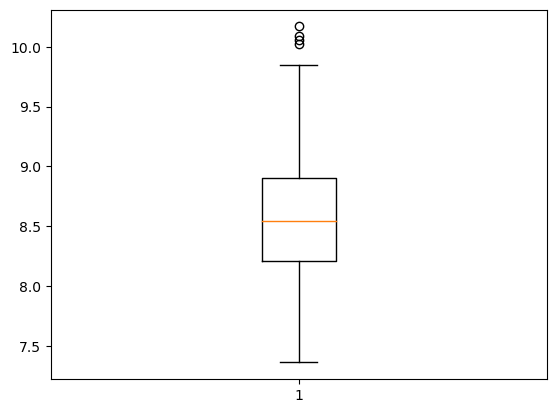

In [35]:
plt.boxplot(data['Ca']) # outliers have been removed now
plt.show()

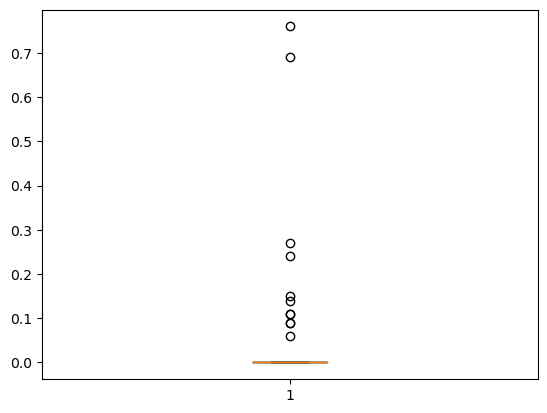

In [36]:
plt.boxplot(data['Ba'])
plt.show()

Range of Ba: 0-0.7. Right skewed data. Range from 0-0.3 is dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There are two outliers above 0.6 and we can remove them from the dataset

# Treat outlier in column Ba

In [37]:
data.drop(data[data['Ba'] > 0.6].index,axis=0,inplace=True) 

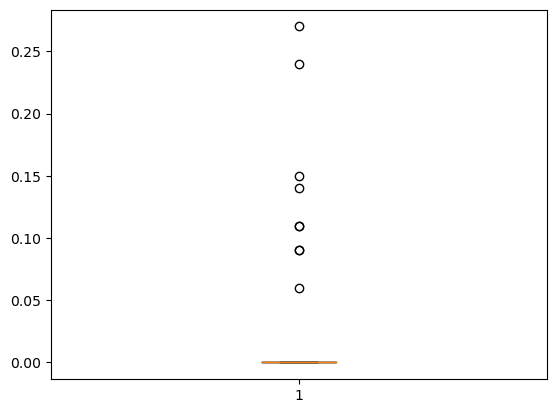

In [38]:
plt.boxplot(data['Ba']) #  outliers have been removed now
plt.show()

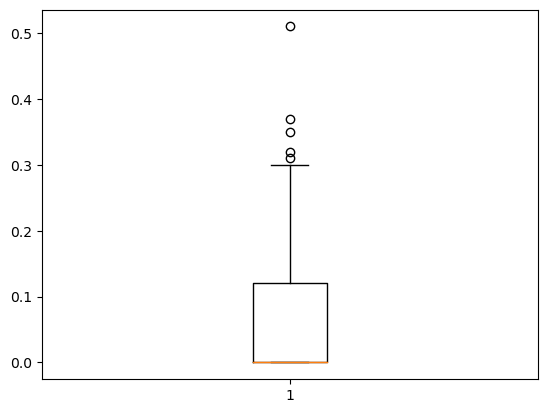

In [39]:
plt.boxplot(data['Fe'])
plt.show()

Range of Fe: 0-0.5. Right skewed data. IQR(Inter Quartile Range) = 0.1-0.0 = 0.1 (approx). Range from 0.3-0.4 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There is one outlier above 0.5 and we can remove it from the dataset

# Treat outlier in column Fe

In [40]:
data.drop(data[data['Fe'] > 0.5].index,axis=0,inplace=True) # remove one outlier above 0.5

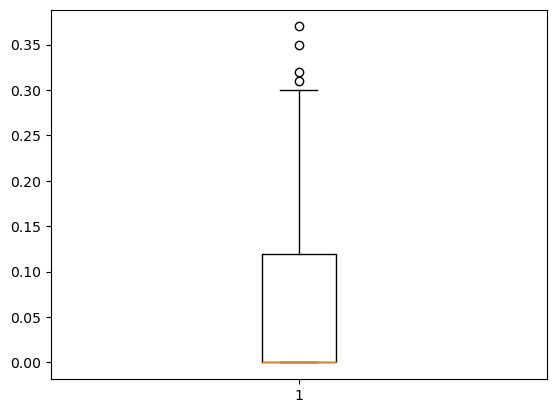

In [41]:
plt.boxplot(data['Fe']) # outlier has been removed now
plt.show()

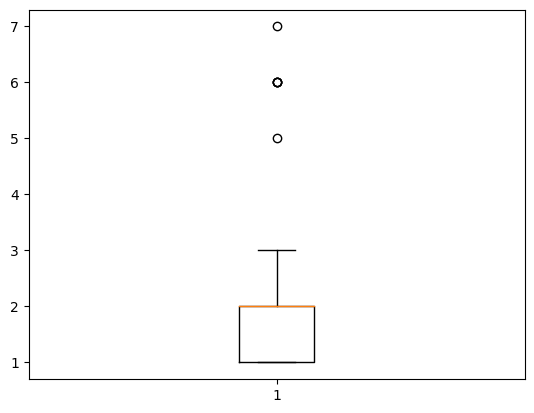

In [42]:
plt.boxplot(data['Type'])
plt.show()

Range of Type: 0-7 : Type indicates class of glass from Type 1 to Type 7 as given in the dataset. So, there is no outlier for Type column. (Normally distributed data)

# 2: Data Visualization:

# histograms

<AxesSubplot:>

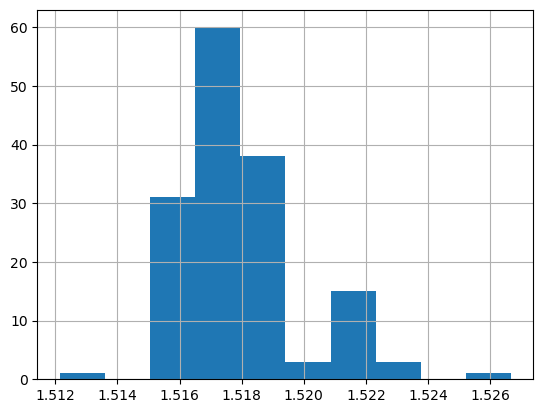

In [43]:
data['RI'].hist() #plot histogram for RI column

Range of RI:1.512 - 1.526  => normally distributed data i.e. no outlier in the dataset

<AxesSubplot:>

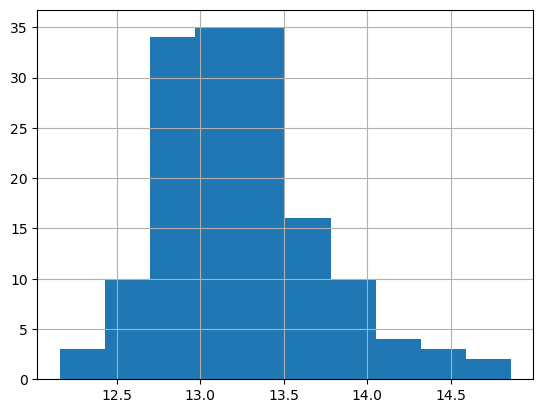

In [44]:
data['Na'].hist() #plot histogram for Na column

Range of Na: 0.5-14.5 => normally distributed data i.e. no outlier in the dataset

<AxesSubplot:>

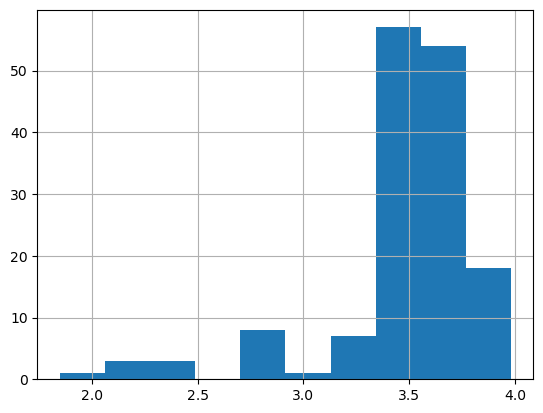

In [45]:
data['Mg'].hist() #plot histogram for Mg column

<AxesSubplot:>

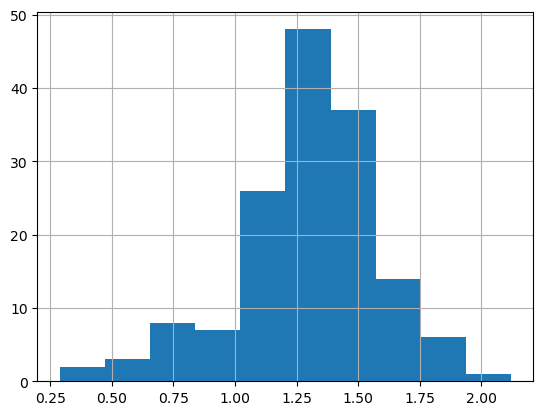

In [46]:
data['Al'].hist() #plot histogram for Al column

<AxesSubplot:>

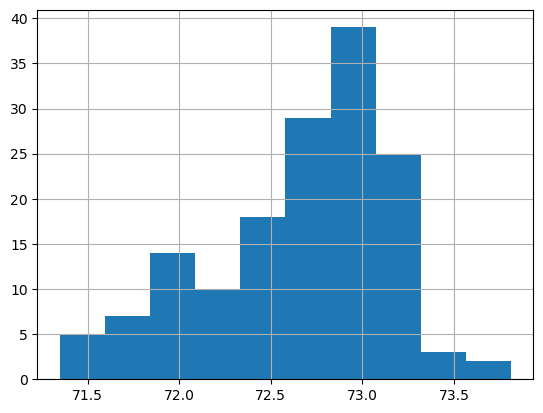

In [47]:
data['Si'].hist() #plot histogram for Si column

<AxesSubplot:>

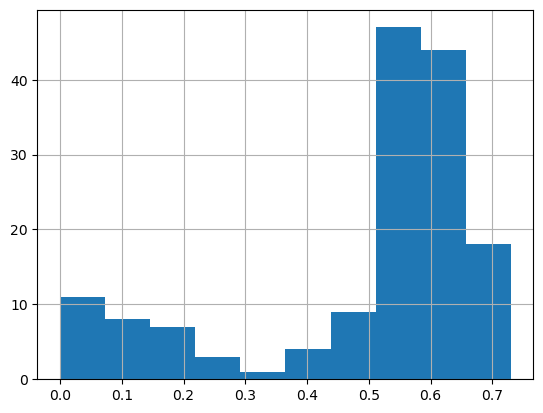

In [48]:
data['K'].hist() #plot histogram for K column

<AxesSubplot:>

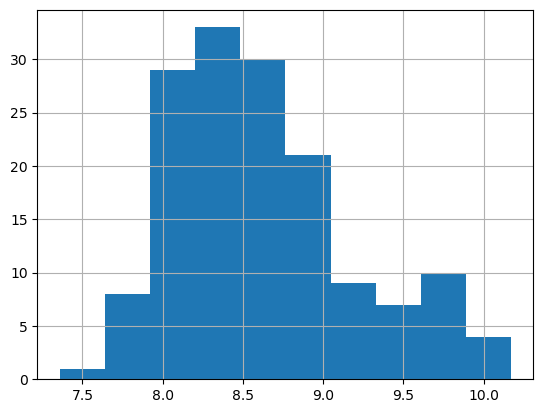

In [49]:
data['Ca'].hist() #plot histogram for Ca column

<AxesSubplot:>

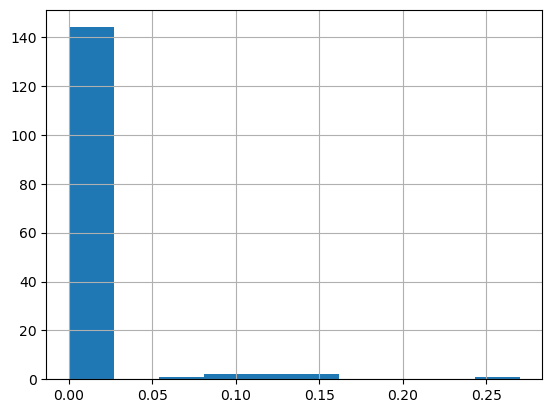

In [50]:
data['Ba'].hist() #plot histogram for Ba column

<AxesSubplot:>

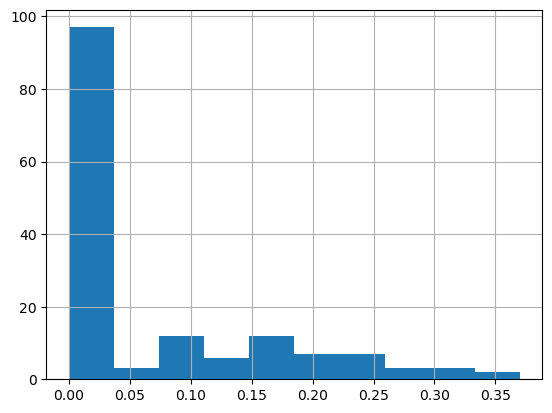

In [51]:
data['Fe'].hist() #plot histogram for Fe column

<AxesSubplot:>

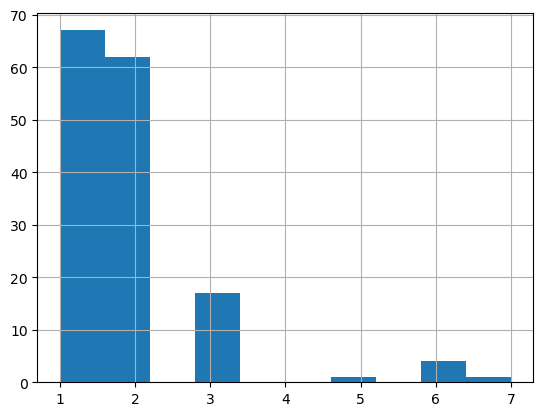

In [52]:
data['Type'].hist() #plot histogram for Type column

# pair plots

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

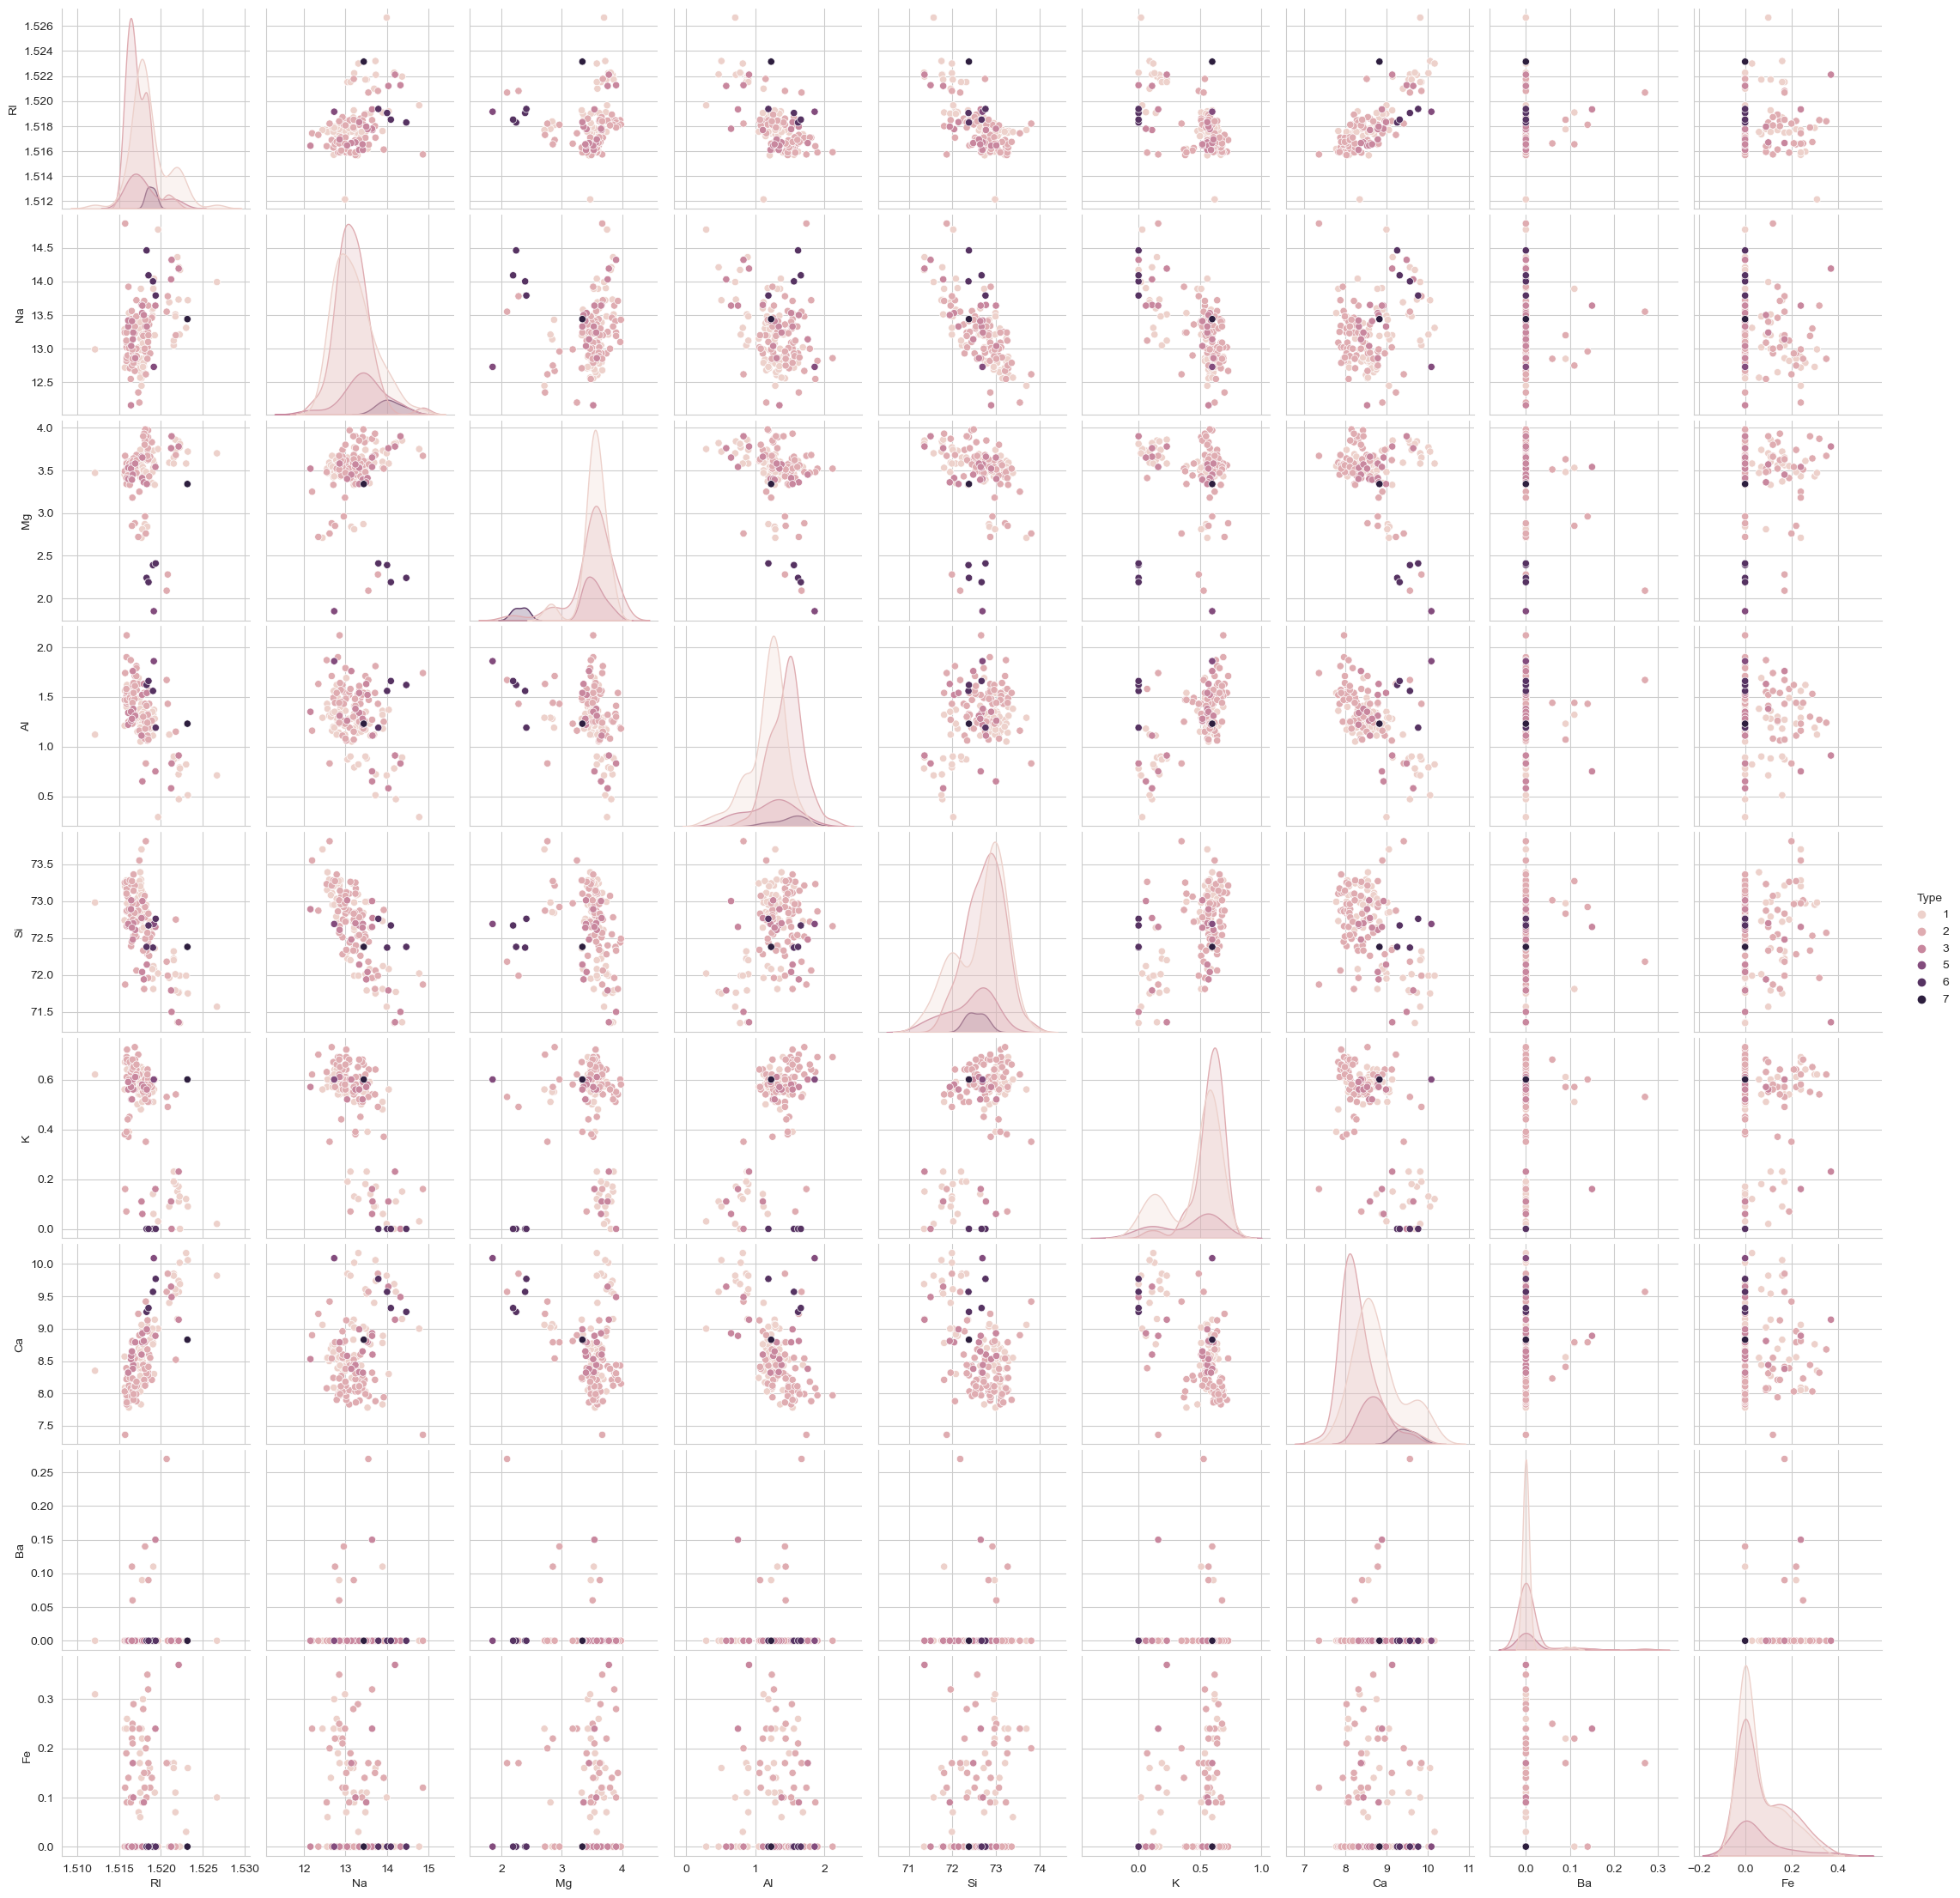

In [54]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='Type') # correlation among all the features 
plt.show()

Let's take first two features : RI, Na

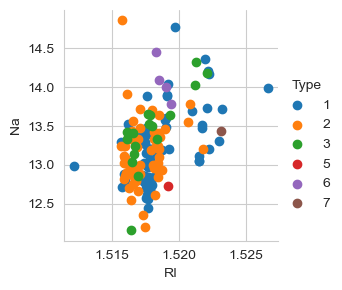

In [55]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Type').map(plt.scatter,'RI','Na').add_legend() # correlation between RI, Na for target var. Type

Inference: Type 5 and Type 7 can be easily identified. Type 1, 2, 3, 6 have some overlap

# correlation matrices
Let's apply heatmap over this data to get the value of correlation between two variables

<AxesSubplot:>

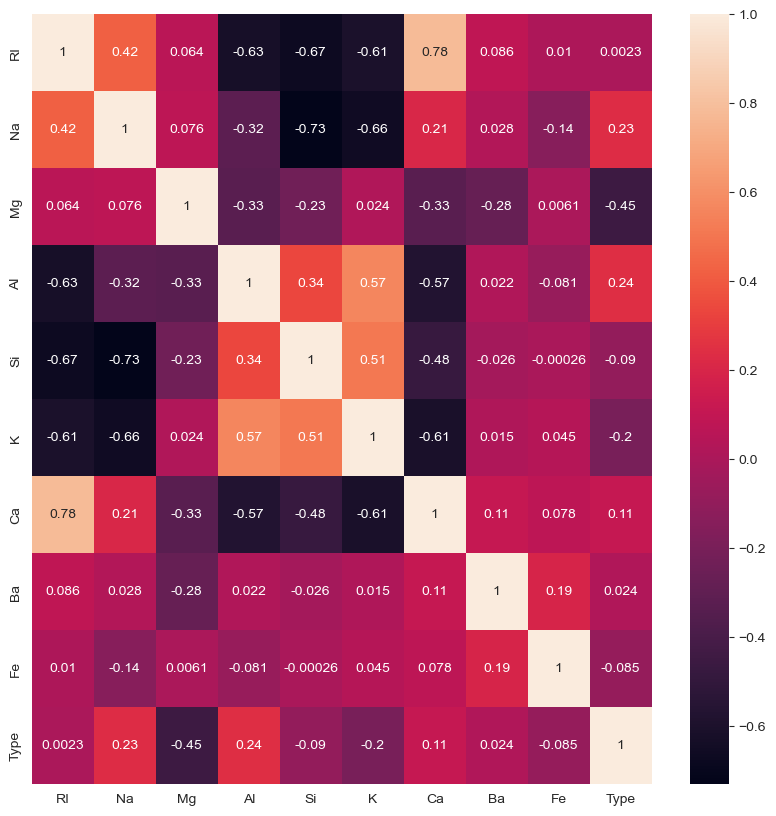

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))  #specify size of heatmap
sns.heatmap(data.corr(),annot=True) #create heatmap (parameter annot is used to display the correlation values, bidefault it is False, so, we have to pass True)

Al(Aluminium)is the most contributing element in deciding the target variable Type because correlation value between Al and Type is 0.24 which is maximum value shown in this heatmap. Also, they have positive correlation (both variable varies in the same direction). The second most contributing element is Na(Sodium) with correlation value 0.23

# 3: Data Preprocessing

Check for missing values in the dataset and decide on a strategy for handling them: There is no missing value in the dataset(already explained above)

If there are categorical variables, apply encoding techniques: There is no categorical column (already explained above)

# Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

Let's check whether our data is balanced or not

In [57]:
from collections import Counter
counter = Counter(data['Type'])

In [58]:
counter   # clearly, our data is imbalanced 

Counter({1: 67, 2: 62, 3: 17, 5: 1, 6: 4, 7: 1})

let's balance the dataset using oversampling. In oversampling, no. of samples added to minority class until minority & majority class have equal distribution of data 

In [59]:
X = data.iloc[:,0:-1]  # define X 
Y = data.iloc[:,-1]   # define target var. Y

In [60]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.00
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.00
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.00
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.00


In [61]:
Y

1      1
2      1
3      1
4      1
5      1
      ..
176    6
177    6
178    6
179    6
187    7
Name: Type, Length: 152, dtype: int64

In [62]:
print(X.shape)
print(Y.shape)

(152, 9)
(152,)


In [63]:
from imblearn.over_sampling import RandomOverSampler  # import RandomOverSampler func from sublib over_sampling
ros = RandomOverSampler(random_state=42)              # save func in ros var.
X, Y = ros.fit_resample(X, Y)                        # it will add new samples in the minority classes

In [64]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
...,...,...,...,...,...,...,...,...,...
397,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.00
398,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.00
399,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.00
400,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.00


In [65]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
397    7
398    7
399    7
400    7
401    7
Name: Type, Length: 402, dtype: int64

In [66]:
print(X.shape)     # 250 rows are added 
print(Y.shape)

(402, 9)
(402,)


In [67]:
counter = Counter(Y)

In [68]:
counter   # equal distribution of data 

Counter({1: 67, 2: 67, 3: 67, 5: 67, 6: 67, 7: 67})

# standardization

In [69]:
from sklearn.preprocessing import StandardScaler # import StandardScaler function
scaler = StandardScaler() # save this func into var. scaler
scaler.fit(X)  # apply StandardScaler on X
X = scaler.transform(X) # StandardScaler function transform the values of X in predefined range of -3 to +3 

In [70]:
X

array([[-0.66061305,  1.00974979,  0.83859058, ..., -1.81489007,
        -0.1558531 , -0.40133396],
       [-1.27930615,  0.34672352,  0.76752059, ..., -1.88964731,
        -0.1558531 , -0.40133396],
       [-0.63898042, -0.24263316,  0.96651657, ..., -1.2317836 ,
        -0.1558531 , -0.40133396],
       ...,
       [ 1.73628193,  0.18096695,  0.46902661, ..., -0.31974527,
        -0.1558531 , -0.40133396],
       [ 1.73628193,  0.18096695,  0.46902661, ..., -0.31974527,
        -0.1558531 , -0.40133396],
       [ 1.73628193,  0.18096695,  0.46902661, ..., -0.31974527,
        -0.1558531 , -0.40133396]])

# 4: Random Forest Model Implementation

test_size = 0.2 means testing data is 20% and training data is 80%

In [71]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40) # training and testing data (model can randomly take 40 rows at a time)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(321, 9)
(81, 9)
(321,)
(81,)


In [73]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest = RandomForestClassifier(n_estimators=100,random_state=10) # 100 decision trees
model_RandomForest.fit(X_train,Y_train) # train the model

RandomForestClassifier(random_state=10)

In [74]:
model_RandomForest.score(X_train,Y_train), model_RandomForest.score(X_test,Y_test) # training & testing accuracy

(1.0, 0.9506172839506173)

training & testing accuracy are very close. So, model is generalised. Here, training accuracy is 100% and testing accuracy is 95% but still model can't be overfitted because model performs well on both training & testing data. We are getting 100% training accuracy without overfitting because our dataset is very simple and also training data is very small (only 321 rows)

since, our model is already generalised for future predictions so we don't need hyperparameter tuning

In [75]:
params = model_RandomForest.get_params() # hyperparameters of RandomForest model (optimal)
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


we can make predictions based on the optimal hyper parameters

In [76]:
Y_pred = model_RandomForest.predict(X_test)  # predict the class of Y for the given testing data
print(Y_pred)

[3 7 6 1 5 5 5 1 7 6 7 3 6 6 6 1 3 2 2 7 7 3 5 3 1 1 1 2 2 5 1 5 3 3 7 1 6
 3 3 6 3 5 3 1 2 5 3 1 3 5 2 7 7 3 5 7 7 3 5 1 1 5 7 3 1 2 3 3 7 1 2 7 7 3
 3 7 3 1 1 3 2]


In [77]:
print(list(zip(Y_test,Y_pred)))   # compare the actual class of Y with the predicted class of Y

[(3, 3), (7, 7), (6, 6), (1, 1), (5, 5), (5, 5), (5, 5), (1, 1), (7, 7), (6, 6), (7, 7), (3, 3), (6, 6), (6, 6), (6, 6), (1, 1), (3, 3), (2, 2), (1, 2), (7, 7), (7, 7), (3, 3), (5, 5), (3, 3), (1, 1), (1, 1), (1, 1), (1, 2), (2, 2), (5, 5), (1, 1), (5, 5), (3, 3), (3, 3), (7, 7), (1, 1), (6, 6), (3, 3), (3, 3), (6, 6), (3, 3), (5, 5), (3, 3), (1, 1), (2, 2), (5, 5), (3, 3), (1, 1), (3, 3), (5, 5), (2, 2), (7, 7), (7, 7), (3, 3), (5, 5), (7, 7), (7, 7), (3, 3), (5, 5), (1, 1), (1, 1), (5, 5), (7, 7), (3, 3), (1, 1), (2, 2), (2, 3), (3, 3), (7, 7), (1, 1), (2, 2), (7, 7), (7, 7), (3, 3), (3, 3), (7, 7), (3, 3), (1, 1), (1, 1), (1, 3), (2, 2)]


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[16  2  1  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 15]]
classification report
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        19
           2       0.78      0.88      0.82         8
           3       0.91      1.00      0.95        20
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        15

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.96      0.95      0.95        81

accuracy of the model: 0.9506172839506173


Confusion matrix is a matrix which represents the summary of the prediction results on a classification problem.

Precision means percentage of True positive predictions among all positive predictions made by the model. It is calculated as the ratio of TP to the sum of TP and false positives (FP).

F1 Score is a metric that balances precision and recall. It is calculated as the mean of precision and recall.

recall is the accuracy of individual class.

Inference: accuracy of Class 1 is 84%, class 2 is 88%, rest classes have 100% accuracy on unseen data. 
In our dataset, each class has equal distribution of data, so, there is no biasness. 

Overall accuracy of the model is 95%

In [79]:
print(list(zip(data.columns[0:-1], model_RandomForest.feature_importances_))) # score of all input features 

[('RI', 0.19793793019801334), ('Na', 0.06718238939296084), ('Mg', 0.22757481122178197), ('Al', 0.11460611656240759), ('Si', 0.06426018044000681), ('K', 0.15798074575260976), ('Ca', 0.1480560062175073), ('Ba', 0.003279715223665053), ('Fe', 0.019122104991047398)]


Mg(Magnesium) is the most important feature in deciding the class of Y 

Let's check the result of each Random Forest classifier individually

In [80]:
for i, classifier in enumerate(model_RandomForest):  # classifier = enumerate(model_RandomForest), i =0
    Y_pred = classifier.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy:"+str(i+1),':', accuracy)

Accuracy:1 : 0.06172839506172839
Accuracy:2 : 0.07407407407407407
Accuracy:3 : 0.07407407407407407
Accuracy:4 : 0.037037037037037035
Accuracy:5 : 0.06172839506172839
Accuracy:6 : 0.08641975308641975
Accuracy:7 : 0.07407407407407407
Accuracy:8 : 0.07407407407407407
Accuracy:9 : 0.024691358024691357
Accuracy:10 : 0.037037037037037035
Accuracy:11 : 0.09876543209876543
Accuracy:12 : 0.024691358024691357
Accuracy:13 : 0.08641975308641975
Accuracy:14 : 0.07407407407407407
Accuracy:15 : 0.04938271604938271
Accuracy:16 : 0.07407407407407407
Accuracy:17 : 0.07407407407407407
Accuracy:18 : 0.024691358024691357
Accuracy:19 : 0.08641975308641975
Accuracy:20 : 0.04938271604938271
Accuracy:21 : 0.037037037037037035
Accuracy:22 : 0.07407407407407407
Accuracy:23 : 0.06172839506172839
Accuracy:24 : 0.08641975308641975
Accuracy:25 : 0.06172839506172839
Accuracy:26 : 0.024691358024691357
Accuracy:27 : 0.08641975308641975
Accuracy:28 : 0.09876543209876543
Accuracy:29 : 0.07407407407407407
Accuracy:30 : 0.

# 5: Bagging and Boosting Methods

# Creating a Bagging Classifier

In [81]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators = 100, random_state = 10) # Create bagging classifier (100 decision trees)
clf.fit(X_train, Y_train)  # train the model

BaggingClassifier(n_estimators=100, random_state=10)

In [82]:
clf.score(X_train,Y_train), clf.score(X_test,Y_test) # training & testing accuracy

(1.0, 0.9135802469135802)

training & testing accuracy are very close. So, model is generalised. Here, training accuracy is 100% and testing accuracy is 91% but still model can't be overfitted because model performs well on both training & testing data. We are getting 100% training accuracy without overfitting because our dataset is very simple and also training data is very small (only 321 rows)

since, our model is already generalised for future predictions so we don't need hyperparameter tuning

In [83]:
params = clf.get_params() # hyperparameters of Bagging classifier model (optimal)
print(params)

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


In [84]:
Y_pred = clf.predict(X_test)  # predict the class of Y for the given testing data
print(Y_pred)

[3 7 6 1 5 5 5 1 7 6 7 3 6 6 6 7 3 2 2 7 7 3 5 3 1 1 1 2 2 5 2 5 3 3 7 1 6
 3 3 6 3 5 3 7 2 5 3 1 3 5 2 7 7 3 5 7 7 3 5 3 1 5 7 3 1 2 3 3 7 1 2 7 7 3
 3 7 3 1 1 1 2]


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[13  3  1  0  0  2]
 [ 0  7  1  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 15]]
classification report
              precision    recall  f1-score   support

           1       1.00      0.68      0.81        19
           2       0.70      0.88      0.78         8
           3       0.91      1.00      0.95        20
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         7
           7       0.88      1.00      0.94        15

    accuracy                           0.91        81
   macro avg       0.92      0.93      0.91        81
weighted avg       0.93      0.91      0.91        81

accuracy of the model: 0.9135802469135802


recall is the accuracy of individual class.

Inference: accuracy of Class 1 is 68%, class 2 is 88%, rest classes have 100% accuracy on unseen data. In our dataset, each class has equal distribution of data, so, there is no biasness.

Overall accuracy of the model is 91% which is slightly less than the accuracy of RandomForest model(95%)

Let's check the result of each Bagging classifier individually

In [86]:
for i, classifier in enumerate(clf):  # classifier = enumerate(clf), i =0
    Y_pred = classifier.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy:"+str(i+1),':', accuracy)

Accuracy:1 : 0.037037037037037035
Accuracy:2 : 0.07407407407407407
Accuracy:3 : 0.13580246913580246
Accuracy:4 : 0.08641975308641975
Accuracy:5 : 0.08641975308641975
Accuracy:6 : 0.06172839506172839
Accuracy:7 : 0.07407407407407407
Accuracy:8 : 0.04938271604938271
Accuracy:9 : 0.037037037037037035
Accuracy:10 : 0.07407407407407407
Accuracy:11 : 0.037037037037037035
Accuracy:12 : 0.04938271604938271
Accuracy:13 : 0.09876543209876543
Accuracy:14 : 0.08641975308641975
Accuracy:15 : 0.08641975308641975
Accuracy:16 : 0.06172839506172839
Accuracy:17 : 0.08641975308641975
Accuracy:18 : 0.037037037037037035
Accuracy:19 : 0.07407407407407407
Accuracy:20 : 0.06172839506172839
Accuracy:21 : 0.06172839506172839
Accuracy:22 : 0.09876543209876543
Accuracy:23 : 0.06172839506172839
Accuracy:24 : 0.09876543209876543
Accuracy:25 : 0.06172839506172839
Accuracy:26 : 0.09876543209876543
Accuracy:27 : 0.09876543209876543
Accuracy:28 : 0.07407407407407407
Accuracy:29 : 0.13580246913580246
Accuracy:30 : 0.061

# Boosting methods: AdaBoost, XG-Boost

# AdaBoost

In [87]:
from sklearn.ensemble import AdaBoostClassifier
model_Ada = AdaBoostClassifier(base_estimator= RandomForestClassifier(random_state=10),n_estimators=100,random_state=10) # create AdaBoostClassifier (100 decision trees)
model_Ada.fit(X_train,Y_train) # train the model

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=10),
                   n_estimators=100, random_state=10)

In [88]:
model_Ada.score(X_train,Y_train), model_Ada.score(X_test,Y_test) # training & testing accuracy

(1.0, 0.9259259259259259)

training & testing accuracy are very close. So, model is generalised. Here, training accuracy is 100% and testing accuracy is 92% but still model can't be overfitted because model performs well on both training & testing data. We are getting 100% training accuracy without overfitting because our dataset is very simple and also training data is very small (only 321 rows)

since, our model is already generalised for future predictions so we don't need hyperparameter tuning

In [89]:
params = model_Ada.get_params() # hyperparameters of AdaBoostclassifier model (optimal)
print(params)

{'algorithm': 'SAMME.R', 'base_estimator__bootstrap': True, 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': 'auto', 'base_estimator__max_leaf_nodes': None, 'base_estimator__max_samples': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__n_estimators': 100, 'base_estimator__n_jobs': None, 'base_estimator__oob_score': False, 'base_estimator__random_state': 10, 'base_estimator__verbose': 0, 'base_estimator__warm_start': False, 'base_estimator': RandomForestClassifier(random_state=10), 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 10}


In [90]:
Y_pred = model_Ada.predict(X_test)  # predict the class of Y for the given testing data
print(Y_pred)

[3 7 6 1 5 5 5 1 7 6 7 3 6 6 6 1 3 2 2 7 7 3 5 3 1 1 1 2 2 5 1 5 3 3 7 1 6
 3 3 6 3 5 3 1 2 5 3 1 3 5 2 7 7 3 5 7 7 3 5 1 1 5 7 3 1 2 3 3 7 1 2 7 7 3
 3 7 3 3 2 3 2]


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[14  3  2  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 15]]
classification report
              precision    recall  f1-score   support

           1       1.00      0.74      0.85        19
           2       0.70      0.88      0.78         8
           3       0.87      1.00      0.93        20
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        15

    accuracy                           0.93        81
   macro avg       0.93      0.94      0.93        81
weighted avg       0.94      0.93      0.93        81

accuracy of the model: 0.9259259259259259


recall is the accuracy of individual class.

Inference: accuracy of Class 1 is 74%, class 2 is 88%, rest classes have 100% accuracy on unseen data. In our dataset, each class has equal distribution of data, so, there is no biasness.

Overall accuracy of the AdaBoost model is 92% which is slightly better than the Bagging classifier model (91%). However, it's   
slightly less than the accuracy of RandomForest model(95%)

In [92]:
print(list(zip(data.columns[0:-1], model_Ada.feature_importances_))) # score of all input features

[('RI', 0.18905907695221805), ('Na', 0.09138581459875243), ('Mg', 0.21669493515762284), ('Al', 0.11480636196978677), ('Si', 0.051714482953713614), ('K', 0.17580060419524576), ('Ca', 0.13954349856064044), ('Ba', 0.0025308538031767313), ('Fe', 0.01846437180884349)]


Mg(Magnesium) is the most important feature in deciding the class of Y 

# XG-Boost

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
model_Grad = GradientBoostingClassifier(n_estimators=100,random_state=10) # create XGBoostClassifier (100 decision trees)
model_Grad.fit(X_train,Y_train) # train the model

GradientBoostingClassifier(random_state=10)

In [94]:
model_Grad.score(X_train,Y_train), model_Grad.score(X_test,Y_test) # training & testing accuracy

(1.0, 0.9382716049382716)

training & testing accuracy are very close. So, model is generalised. Here, training accuracy is 100% and testing accuracy is 93% but still model can't be overfitted because model performs well on both training & testing data. We are getting 100% training accuracy without overfitting because our dataset is very simple and also training data is very small (only 321 rows)

since, our model is already generalised for future predictions so we don't need hyperparameter tuning

In [95]:
params = model_Grad.get_params() # hyperparameters of XGBoostclassifier model (optimal)
print(params)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 10, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [96]:
Y_pred = model_Grad.predict(X_test)  # predict the class of Y for the given testing data
print(Y_pred)

[3 7 6 1 5 5 5 1 7 6 7 3 6 6 6 1 3 2 2 7 7 3 5 3 1 1 1 2 2 5 1 5 3 3 7 1 6
 1 3 6 3 5 3 1 2 5 3 1 3 5 2 7 7 3 5 7 7 3 5 1 1 5 7 3 1 2 3 3 7 1 2 7 7 3
 3 7 3 3 1 1 2]


In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[16  2  1  0  0  0]
 [ 0  7  1  0  0  0]
 [ 1  0 19  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 15]]
classification report
              precision    recall  f1-score   support

           1       0.94      0.84      0.89        19
           2       0.78      0.88      0.82         8
           3       0.90      0.95      0.93        20
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        15

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81

accuracy of the model: 0.9382716049382716


recall is the accuracy of individual class.

Inference: accuracy of Class 1 is 84%, class 2 is 88%, class 3 is 95%, rest classes have 100% accuracy on unseen data. In our dataset, each class has equal distribution of data, so, there is no biasness.

Overall accuracy of the XGBoost model is 93% which is slightly better than the AdaBoostclassifier model (92%). However, it's
slightly less than the accuracy of RandomForest model(95%)

# Order of accuracy of these models in descending order/ compare the results: 

RandomForest classifier(95%) > XGBoost classifier(93%) > AdaBoost classifier(92%) > Bagging classifier(91%)

In [98]:
 print(list(zip(data.columns[0:-1], model_Grad.feature_importances_))) # score of all input features

[('RI', 0.2684378205412213), ('Na', 0.022864724383785166), ('Mg', 0.11714871121939543), ('Al', 0.05091558954068856), ('Si', 0.04203470491416288), ('K', 0.19851191259608236), ('Ca', 0.25648325487846263), ('Ba', 0.00550821963008918), ('Fe', 0.03809506229611254)]


RI(Refractive Index)is the most contributing feature in deciding the class of Y

# Stacking

It combines strong models (heterogeneous) to create a robust model (also known as meta-model). As we know, bagging reduce the variance, boosting reduce the bias whereas stacking reduce both variance and bias and therefore, stacking improve the overall performance of the model

In [99]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier   # base model
from sklearn.svm import SVC                           # base model
from sklearn.linear_model import LogisticRegression  # meta model

In [100]:
# define base models
base_models = [('rf', RandomForestClassifier(n_estimators=100,random_state=42)), ('svm',SVC(probability=True,random_state=42))]

In [101]:
meta_model = LogisticRegression()   # define meta model

In [102]:
stacking_clf = StackingClassifier(estimators=base_models,final_estimator=meta_model) # initialise and train the stacking classifier
stacking_clf.fit(X_train,Y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [103]:
stacking_clf.score(X_train,Y_train), stacking_clf.score(X_test,Y_test) # training and testing accuracy

(0.9968847352024922, 0.9382716049382716)

In [104]:
params = stacking_clf.get_params() # hyperparameters of stacking classifier (optimal)
print(params)

{'cv': None, 'estimators': [('rf', RandomForestClassifier(random_state=42)), ('svm', SVC(probability=True, random_state=42))], 'final_estimator__C': 1.0, 'final_estimator__class_weight': None, 'final_estimator__dual': False, 'final_estimator__fit_intercept': True, 'final_estimator__intercept_scaling': 1, 'final_estimator__l1_ratio': None, 'final_estimator__max_iter': 100, 'final_estimator__multi_class': 'auto', 'final_estimator__n_jobs': None, 'final_estimator__penalty': 'l2', 'final_estimator__random_state': None, 'final_estimator__solver': 'lbfgs', 'final_estimator__tol': 0.0001, 'final_estimator__verbose': 0, 'final_estimator__warm_start': False, 'final_estimator': LogisticRegression(), 'n_jobs': None, 'passthrough': False, 'stack_method': 'auto', 'verbose': 0, 'rf': RandomForestClassifier(random_state=42), 'svm': SVC(probability=True, random_state=42), 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__max_fea

In [105]:
Y_pred = stacking_clf.predict(X_test)  # predict the class of Y for the given testing data
print(Y_pred)

[3 7 6 1 5 5 5 1 7 6 7 3 6 6 6 1 3 2 2 7 7 3 5 3 1 1 1 2 2 5 2 5 3 3 7 1 6
 3 3 6 3 5 3 1 2 5 3 1 3 5 2 7 7 3 5 7 7 3 5 1 1 5 7 3 1 2 3 3 7 1 2 7 7 3
 3 7 3 1 2 1 2]


In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[15  4  0  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 15]]
classification report
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       0.64      0.88      0.74         8
           3       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        15

    accuracy                           0.94        81
   macro avg       0.93      0.94      0.93        81
weighted avg       0.95      0.94      0.94        81

accuracy of the model: 0.9382716049382716


# Additional Notes:

# Explain Bagging and Boosting methods. How is it different from each other.

Bagging & Boosting are ensemble technique. Ensemble technique is a ML technique where we club multiple algorithms and do voting.
For example: if out of 10 algorithms , 8 algorithms are giving output as 'YES' is the predicted class whereas 2 algorithms are giving output as 'NO' is the predicted class. Since, more votes are given to 'YES' class, so, 'YES' will be the final predicted class. This is known as ensemble technique. 

In Bagging, each & every algorithm run(train) in parallel and are independent of each other which means each algorithm will give independent prediction. The final prediction will be the mean of all independent predictions. This is called as Bagging

In Boosting, each & every algorithm is linked with each other. We train one algorithm and validate it and pass it's error(wrong prediction) to the next algorithm. In this way, next algorithm will be knowing the error made by the previous algorithm i.e. each algorithm tries to correct the mistake of the previous algorithm. 

Boosting is preferred over bagging.

Boosting is of 2 types: XG-Boost, AdaBoost

XG-Boost (Extreme Gradient Boosting) increases the weight of the error data points i.e. increases the weight of the rows that make wrong predictions.

AdaBoost (Adaptive Boosting) increases the weight of the error data points and also decreases the weight of the correctly classified data points. 

# Explain how to handle imbalance in the data.

Imbalanced data pertains to datasets where the distribution of observations in the target class is uneven. In other words, one class label has a significantly higher number of observations(majority class), while the other has a notably lower count(minority class)

There are majorly 3 methods to balance the data : 

1. collect more data

2. undersampling

3. oversampling

Oversampling — increases the no. of samples in the minority class until the minority & majority class have an equal distribution of data. 

Advantage- we don't lose the important information 

Disadvantage: it could decrease the model's run time


Undersampling — remove samples from the majority class until the minority & majority class have an equal distribution of data. 

Advantage- it could improve the model's run time 

Disadvantage- it could result loss of useful information 